### Dataset

In [1]:
import pandas as pd

df = pd.read_csv('data/train_eda_df.csv')
df

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Previous_Date,Artist_Year_Score,Points_Category
0,128,Romantic - NOTD Remix,Stanaj,2017-01-24,0.746,0.631,-7968.00,0.231,0.218,0.000,...,Nationality 1,Albania,Europe,73,73.0,3SGWp9fJCzgK0WcpcKSQdy,https://open.spotify.com/track/3SGWp9fJCzgK0Wc...,2017-01-23,512.0,2
1,156,Bubalu,"Becky G, Prince Royce, DJ Luian, Mambo Kingz, ...",2019-03-31,0.800,0.355,-10.47,0.090,0.616,0.000,...,Nationality 1,United States,Anglo-America,45,9.0,7dNwJbsT0sg1le5kVugGJb,https://open.spotify.com/track/7dNwJbsT0sg1le5...,2019-03-30,26814.6,2
2,108,Redemption (with Babes Wodumo),Zacari,2018-02-09,0.782,0.762,-7143.00,0.095,0.139,0.019,...,Nationality 1,United States,Anglo-America,93,93.0,4YMHk2VRIQpRv4aFtRzH12,https://open.spotify.com/track/4YMHk2VRIQpRv4a...,2018-02-08,0.0,3
3,32,WAP (feat. Megan Thee Stallion),Cardi B,2021-02-05,0.935,0.454,-7509.00,0.375,0.019,0.000,...,Nationality 1,United States,Anglo-America,169,169.0,4Oun2ylbjFKMPTiaSbbCih,https://open.spotify.com/track/4Oun2ylbjFKMPTi...,2021-02-04,33852.0,5
4,15,bad guy,Billie Eilish,2019-11-21,0.701,0.425,-10965.00,0.375,0.328,0.130,...,Nationality 1,United States,Anglo-America,186,186.0,2Fxmhks0bxGSBdJ92vM42m,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...,2019-11-20,331366.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376343,166,Into the Unknown - Panic! At The Disco Version,Panic! At The Disco,2019-11-25,0.456,0.828,-6225.00,0.077,0.024,0.000,...,Nationality 1,United States,Anglo-America,35,35.0,421eObjg0DTm2qajJl5OJm,https://open.spotify.com/track/421eObjg0DTm2qa...,2019-11-24,48656.0,1
376344,133,Berlin lebt,Capital Bra,2018-06-10,0.651,0.655,-6652.00,0.373,0.139,0.000,...,Nationality 1,Germany,Europe,68,68.0,1uJ7IQJdeAvmUDpIyZb0be,https://open.spotify.com/track/1uJ7IQJdeAvmUDp...,2018-06-09,1250.0,2
376345,32,2055,Sleepy Hallow,2021-08-19,0.829,0.512,-5865.00,0.187,0.492,0.000,...,Nationality 1,United States,Anglo-America,169,169.0,4XvcHTUfIlWfyJTRG0aqlo,https://open.spotify.com/track/4XvcHTUfIlWfyJT...,2021-08-18,4497.0,5
376346,39,Heat Waves,Glass Animals,2021-06-07,0.761,0.525,-6.90,0.094,0.440,0.000,...,Nationality 1,United Kingdom,Europe,162,162.0,02MWAaffLxlfxAUY7c5dvx,https://open.spotify.com/track/02MWAaffLxlfxAU...,2021-06-06,24878.0,5


In [2]:
df.columns

Index(['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Valence', '# of Artist', 'Artist (Ind.)', '# of Nationality',
       'Nationality', 'Continent', 'Points (Total)',
       'Points (Ind for each Artist/Nat)', 'id', 'Song URL', 'Previous_Date',
       'Artist_Year_Score', 'Points_Category'],
      dtype='object')

### Exploratory Data Analysis
1. Boxplot

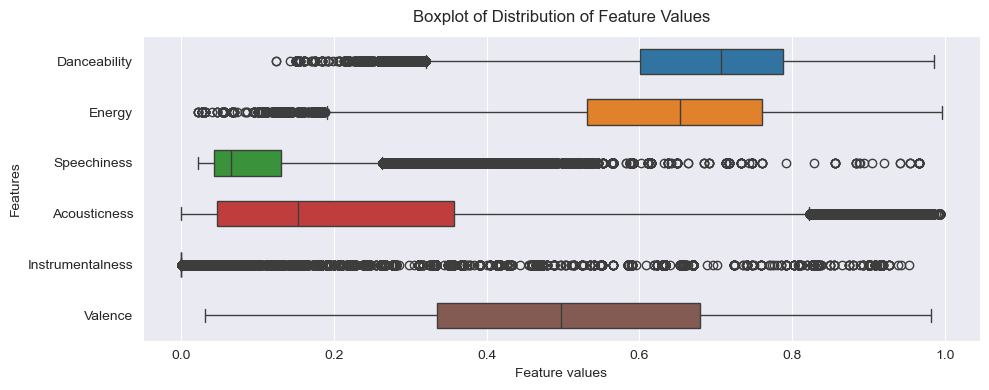

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 4))
features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']
ax = sns.boxplot(data=df[features], orient="h", width=0.5)
ax.set_xlabel('Feature values')
ax.set_ylabel('Features')
ax.set_title('Boxplot of Distribution of Feature Values', pad=10)
plt.tight_layout()
plt.show()

In [4]:
fig.savefig("figures/track features distribution (excluding loudness).pdf")

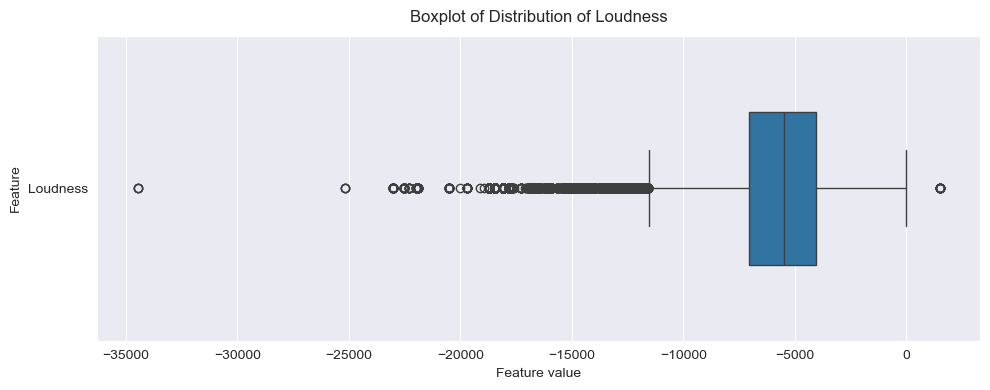

In [5]:
fig, ax = plt.subplots(figsize=(10, 4))
features = ['Loudness']
ax = sns.boxplot(data=df[features], orient="h", width=0.5)
ax.set_xlabel('Feature value')
ax.set_ylabel('Feature')
ax.set_title('Boxplot of Distribution of Loudness', pad=10)
plt.tight_layout()
plt.show()

In [6]:
fig.savefig("figures/Distribution of loudness.pdf")

2. Line Graph

In [7]:
import numpy as np

np.random.seed(970225)
artists = np.random.choice(df['Artist (Ind.)'], 3, replace=False)
line_data = df[['Artist (Ind.)', 'Date', 'Points (Ind for each Artist/Nat)']][::-1]
dates = pd.to_datetime(pd.Series(line_data[line_data['Artist (Ind.)'].isin(artists)]['Date'].unique()), format='%Y-%m-%d')

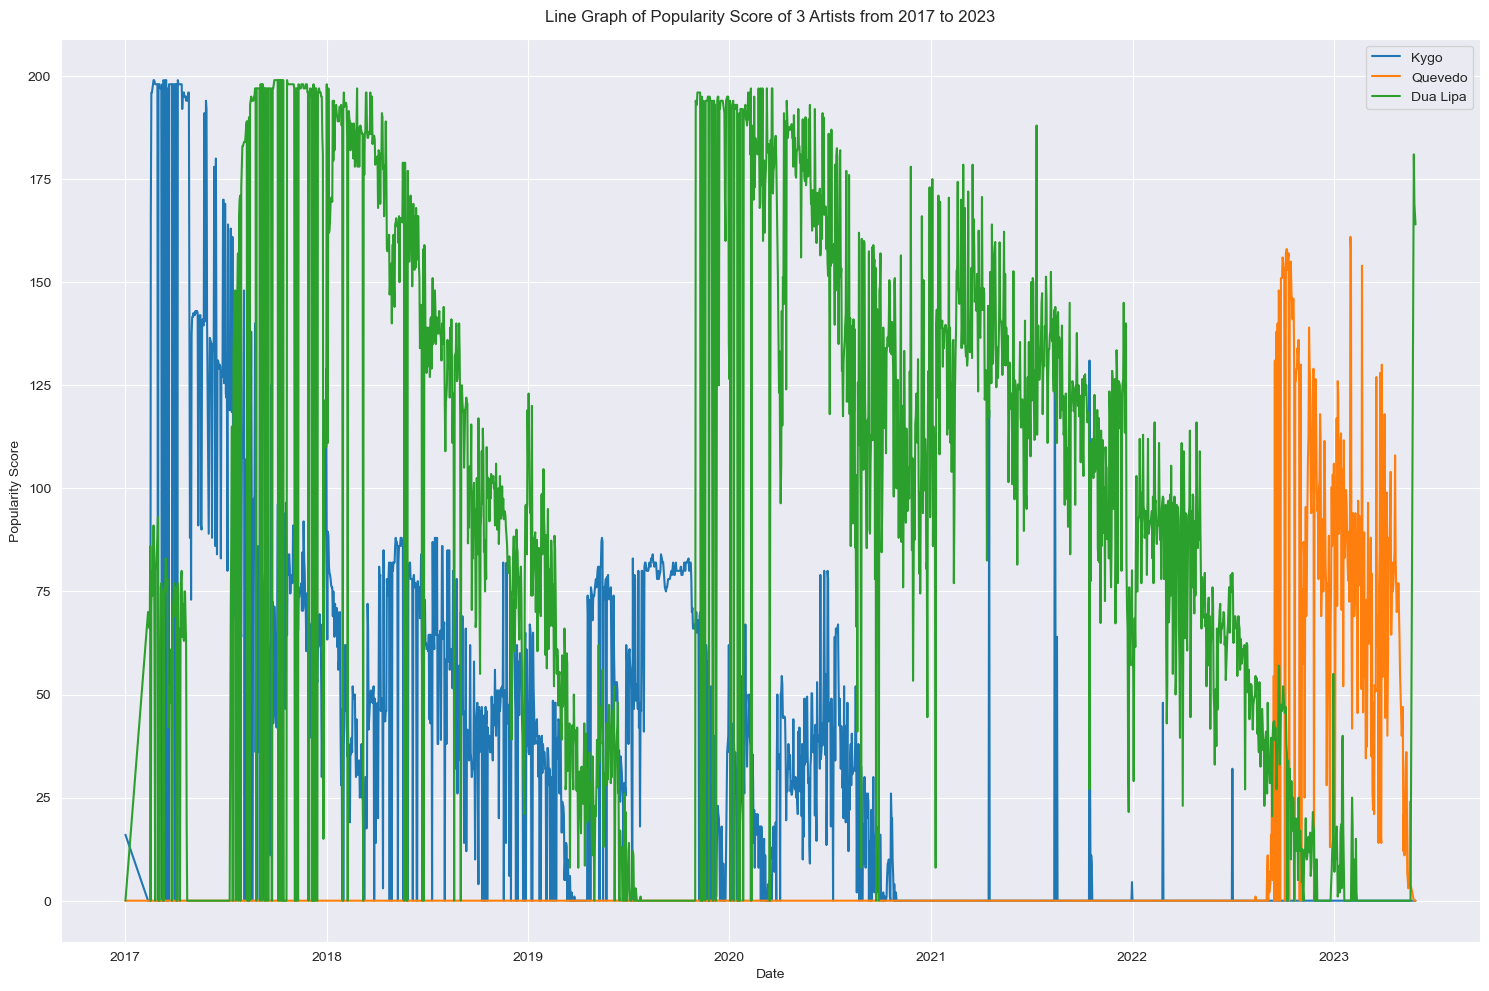

In [8]:
pd.options.mode.chained_assignment = None

fig, ax = plt.subplots(figsize=(15, 10))

for a in artists:
    art_df = line_data[line_data['Artist (Ind.)'] == a]
    art_df.loc[:, 'Date'] = pd.to_datetime(art_df['Date'], format='%Y-%m-%d')
    art_df.sort_values('Date')
    
    fill_df = pd.DataFrame(dates[~dates.isin(art_df['Date'])], columns=['Date'])
    fill_df['Points (Ind for each Artist/Nat)'] = np.zeros(len(fill_df))
    fill_df.loc[:, 'Artist (Ind.)'] = a
    
    art_df = pd.concat([art_df, fill_df]).sort_values('Date')
    
    ax.plot(art_df.groupby('Date', sort=False)['Points (Ind for each Artist/Nat)'].aggregate('mean'), label=a)

ax.set_xlabel('Date')
ax.set_ylabel('Popularity Score')
ax.set_title('Line Graph of Popularity Score of 3 Artists from 2017 to 2023', y=1.01)
plt.tight_layout()
plt.legend()
plt.show()

In [9]:
fig.savefig("figures/Line graph of artist popularity scores from 2017 to 2023.pdf")